In [190]:
!pip install opencv-python

In [191]:
import cv2
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
import matplotlib.pyplot as plt

In [192]:
images_directory="archive/" #dataset link : https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection?select=Br35H-Mask-RCNN

dataset=[]
label=[]

INPUT_SIZE=64

no_tumor_images=os.listdir(images_directory+'no/')
print(len(no_tumor_images))

yes_tumor_images=os.listdir(images_directory+'yes/')

print(len(yes_tumor_images))

1500
1500


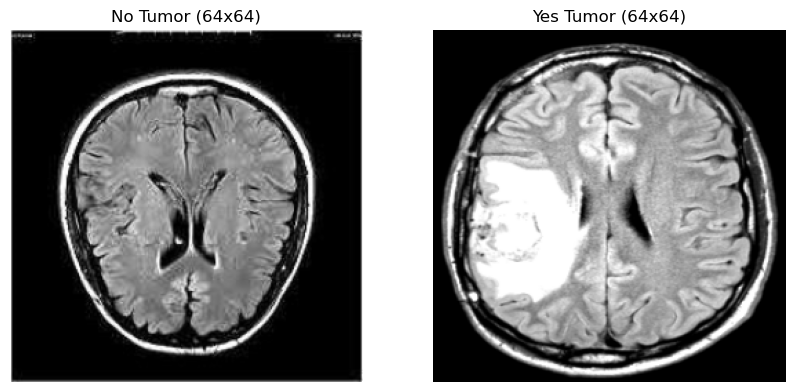

In [193]:
# Chargement et redimensionnement
new_size = (256, 256)
img_no = cv2.imread("archive/no/" + os.listdir("archive/no/")[3])
img_yes = cv2.imread("archive/yes/" + os.listdir("archive/yes/")[5])

img_no = cv2.resize(img_no, new_size)
img_yes = cv2.resize(img_yes, new_size)

# Conversion BGR → RGB (OpenCV charge en BGR par défaut)
img_no = cv2.cvtColor(img_no, cv2.COLOR_BGR2RGB)
img_yes = cv2.cvtColor(img_yes, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_no), plt.title("No Tumor (64x64)"), plt.axis('off')
plt.subplot(122), plt.imshow(img_yes), plt.title("Yes Tumor (64x64)"), plt.axis('off')
plt.show()

# 0 = without tumor
# 1 = with tumor

In [195]:
#chargement des images jpg chaque image 
        #va etre lu en format tableau numpy ensuit 
        # va convertir une image
        # enfin va redimentionner et charge dans DSet
for i,image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(images_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB') #pour utiliser pillow on peux l'evite 
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [196]:
for i,image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(images_directory+'yes/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [197]:
import numpy as np
print(len(dataset))
print(len(label))
np.unique(label, return_counts=True)

3000
3000


(array([0, 1]), array([1500, 1500]))

In [198]:
dataset=np.array(dataset)
label=np.array(label)

x_train,x_test,y_train,y_test=train_test_split(dataset,label,test_size=0.2,random_state=42,stratify=label)

print(x_train.shape)
print(np.unique(y_test, return_counts=True))

(2400, 64, 64, 3)
(array([0, 1]), array([300, 300]))


In [199]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)

In [225]:
#Model Building

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid')) #essayer avec softmax

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,
          batch_size=16,verbose=1,epochs=10,
         validation_data=(x_test,y_test),
         shuffle=False)
model.save('BrainTumorDetection.h5')

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.6210 - loss: 0.6252 - val_accuracy: 0.7633 - val_loss: 0.4992
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.7889 - loss: 0.4755 - val_accuracy: 0.8433 - val_loss: 0.3570
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8370 - loss: 0.3763 - val_accuracy: 0.8767 - val_loss: 0.2949
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8710 - loss: 0.2946 - val_accuracy: 0.9117 - val_loss: 0.2406
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9061 - loss: 0.2271 - val_accuracy: 0.9317 - val_loss: 0.2030
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9360 - loss: 0.1801 - val_accuracy: 0.9333 - val_loss: 0.2009
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9458 - loss: 0.1306 - val_accuracy: 0.9500 - val_loss: 0.1415
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9722 - loss: 0.0851 - val_accu

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


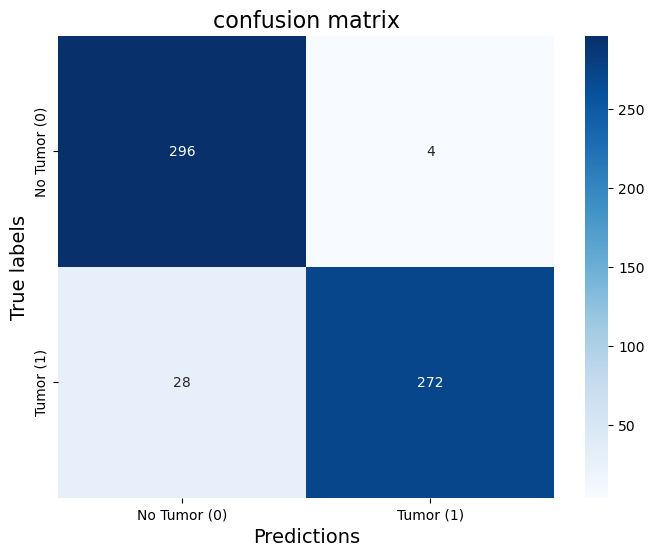

In [201]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['No Tumor (0)', 'Tumor (1)'],
            yticklabels=['No Tumor (0)', 'Tumor (1)'])
plt.title('confusion matrix', fontsize=16)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.show()

In [202]:
print(classification_report(y_test, y_pred_classes, target_names=['No Tumor', 'Tumor']))

              precision    recall  f1-score   support

    No Tumor       0.91      0.99      0.95       300
       Tumor       0.99      0.91      0.94       300

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



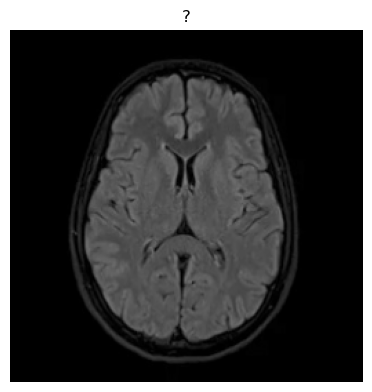

In [221]:
# Chargement et redimensionnement
new_size = (256, 256)
img_no = cv2.imread("archive/pred/pred0.jpg")

# Redimensionnement avec OpenCV
img_no = cv2.resize(img_no, new_size)

# Conversion BGR → RGB (OpenCV charge en BGR par défaut)
img_no = cv2.cvtColor(img_no, cv2.COLOR_BGR2RGB)

# Affichage
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img_no), plt.title("?"), plt.axis('off')
plt.show()

In [223]:
#tester avec une image sur le web voir le fichier de teste elementaire 
imageP=cv2.imread('archive/pred/pred0.jpg')
imageP=Image.fromarray(imageP,'RGB') 
# Convertir l'image PIL en tableau numpy
image_array = np.array(imageP)

# Redimensionner l'image si nécessaire
image_array = cv2.resize(image_array, (INPUT_SIZE, INPUT_SIZE))

# Ajouter une dimension supplémentaire pour représenter le lot (batch) si nécessaire
image_array = np.expand_dims(image_array, axis=0)

# Faire la prédiction
prediction = model.predict(image_array)
if prediction[0][0]==0:
    print("No brain tumor")
elif prediction[0][0]==1:
    print("yes there is a brain tumor")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
No brain tumor
